In [91]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [2]:
Rates = "C:/Users/lionb/Desktop/Suicide_Rate.csv"

In [3]:
SRates = pd.read_csv(Rates)

In [156]:
SRates.head(15)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
SRates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI_for_year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
SRates.describe()

,year,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [46]:
SRates.shape

(27820, 12)

Histogram of the Countries so we can see how many we have and how we want to deal with them

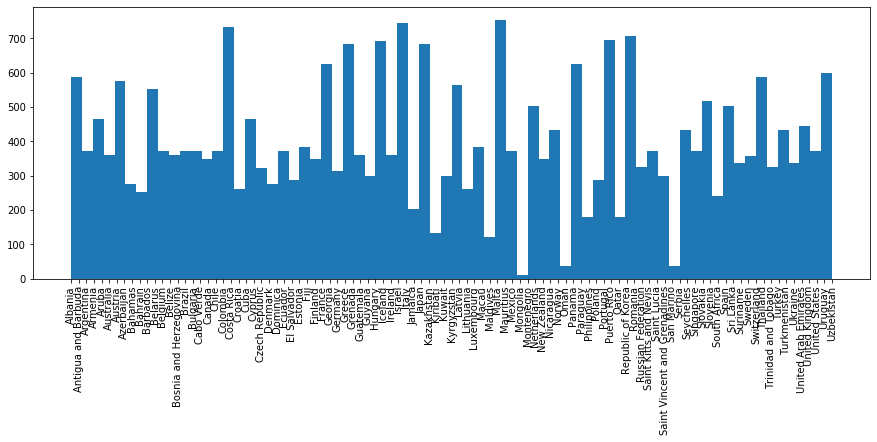

In [49]:
plt.rcParams["figure.figsize"] = (15,5)
plt.hist(SRates.country, bins=70)
plt.xticks(rotation=90)
plt.show()

In [7]:
rateMatrix = SRates.corr()
print (rateMatrix)

                        year  suicides_no  population  suicides/100k pop  \
year                1.000000    -0.004546    0.008850          -0.039037   
suicides_no        -0.004546     1.000000    0.616162           0.306604   
population          0.008850     0.616162    1.000000           0.008285   
suicides/100k pop  -0.039037     0.306604    0.008285           1.000000   
HDI_for_year        0.366786     0.151399    0.102943           0.074279   
gdp_per_capita ($)  0.339134     0.061330    0.081510           0.001785   

                    HDI_for_year  gdp_per_capita ($)  
year                    0.366786            0.339134  
suicides_no             0.151399            0.061330  
population              0.102943            0.081510  
suicides/100k pop       0.074279            0.001785  
HDI_for_year            1.000000            0.771228  
gdp_per_capita ($)      0.771228            1.000000  


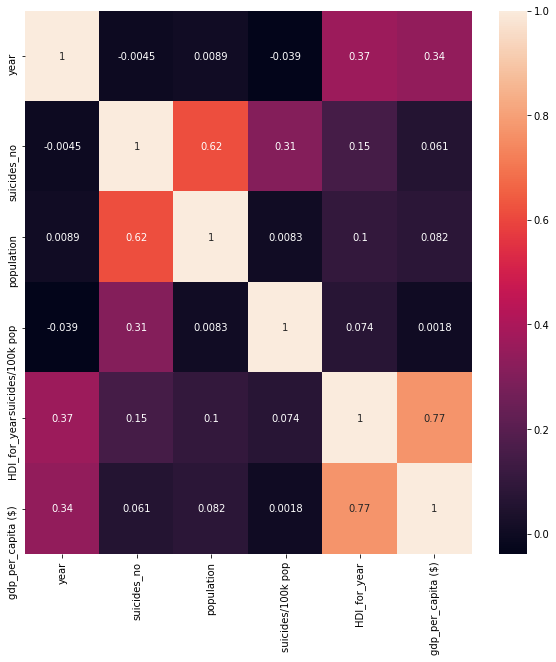

In [8]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(rateMatrix, annot=True)

In [9]:
US_Suicides = SRates[SRates['country']=='United States']
US_Suicides

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27216,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27217,United States,2015,female,75+ years,540,11778666,4.58,United States2015,NaN,"18,120,714,000,000",60387,Silent
27218,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,NaN,"18,120,714,000,000",60387,Generation Z


In [10]:
US_Males = US_Suicides[US_Suicides['sex']=='male']
US_Males

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27209,United States,2015,male,55-74 years,9068,32264697,28.11,United States2015,NaN,"18,120,714,000,000",60387,Boomers
27210,United States,2015,male,35-54 years,11634,41658010,27.93,United States2015,NaN,"18,120,714,000,000",60387,Generation X
27211,United States,2015,male,25-34 years,5503,22137097,24.86,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27212,United States,2015,male,15-24 years,4359,22615073,19.27,United States2015,NaN,"18,120,714,000,000",60387,Millenials


Taking the word years out of age becaseu it seems redundant and we need it removed for linear regression

In [11]:
US_Males['age'] = US_Males['age'].str.replace('years', '')
US_Males['age'] = US_Males['age'].str.replace('+', '')
US_Males['age'] = US_Males['age'].str.replace('-', '_')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

In [12]:
# US_Males['age'] = US_Males['age'].str.replace('+', '')

In [13]:
# US_Males['age'] = US_Males['age'].str.replace('-', '_')

In [14]:
US_Males.suicides_no.median()

4148.0

Finding median of HDI to fill NA value for Regression analysis

In [15]:
import math
median_HDI = US_Males.HDI_for_year.median()
median_HDI

0.903

In [16]:
US_Males.HDI_for_year = US_Males.HDI_for_year.fillna(median_HDI)
US_Males

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55_74,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25_34,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35_54,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15_24,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27209,United States,2015,male,55_74,9068,32264697,28.11,United States2015,0.903,"18,120,714,000,000",60387,Boomers
27210,United States,2015,male,35_54,11634,41658010,27.93,United States2015,0.903,"18,120,714,000,000",60387,Generation X
27211,United States,2015,male,25_34,5503,22137097,24.86,United States2015,0.903,"18,120,714,000,000",60387,Millenials
27212,United States,2015,male,15_24,4359,22615073,19.27,United States2015,0.903,"18,120,714,000,000",60387,Millenials


In [17]:
reg = linear_model.LinearRegression()
reg.fit(US_Males[['age', 'population', 'HDI_for_year']], US_Males.suicides_no)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
reg.coef_

array([5.72873797e-01, 1.70626571e-04, 2.93197412e+03])

In [20]:
reg.intercept_

-3156.8993768154915

Predict suicides per the users input

In [139]:
# reg.predict([[24, 25000000, .86]])

array([5.51520233e+14])

In [148]:
age = int(input('Please input an age between 1 and 120 \n'))
def ageInput(age):
    while (age <= 1 or age >=120):
        age = int(input('improper input, please input an age between 1 and 120 \n'))
        if(age >= 1 and age <=120):
            print('Your selected age is', age)
    return age

ageInput(age)

Please input an age between 1 and 120 
44


44

In [149]:
pop = int(input('Please input a population between 1 and 50 Million \n'))
def popInput(pop):    
    while (pop <= 1 or pop >=50000000):
        pop = int(input('improper input, please input a population between 1 and 50 Million \n'))
        if(pop >= 1 and pop <=50000000):
            print('Your selected population is', pop)
    return pop

popInput(pop)

Please input a population between 1 and 50 Million 
44000000


44000000

In [150]:
HDInput = float(input('Please input a HDI between .1 and .99 \n'))
def GetHDI(HDInput):    
    while (HDInput <= .1 or HDInput >=.99):
        HDInput = float(input('improper input, please input an HDI between .1 and .99 \n'))
        if(HDInput >= 1 and HDInput <=50000000):
            print('Your selected population is', HDInput)
    return HDInput

GetHDI(HDInput)

Please input a HDI between .1 and .99 
.84


0.84

In [154]:
print("your selected age is ", age, "your selected population is ", pop, "and your selected HDI is ", HDInput)

your selected age is  44 your selected population is  44000000 and your selected HDI is  0.84


In [151]:
def GetPrediction(age, pop, HDInput):
    prediction = reg.predict([[age, pop, HDInput]])
    
    return prediction

GetPrediction(age, pop, HDInput)

array([6838.73445826])

KMeans clustering

In [55]:
US_MPopSuic = US_Males[['population', 'suicides_no']]
US_MPopSuic.head(10)

,population,suicides_no
26848,4064000,2177
26849,17971000,5302
26850,20986000,5134
26851,26589000,6053
26852,19962000,4267
26858,17370000,205
26860,4178000,2340
26861,18101000,5500
26862,21393000,5450
26863,27363000,6450


In [93]:
lin_out = stats.linregress(US_Males.population, US_Males.suicides_no)

In [95]:
print(lin_out)

LinregressResult(slope=0.00023183375306125187, intercept=-501.533551936669, rvalue=0.7600078261944752, pvalue=2.8307808745482175e-36, stderr=1.4615225790958216e-05)


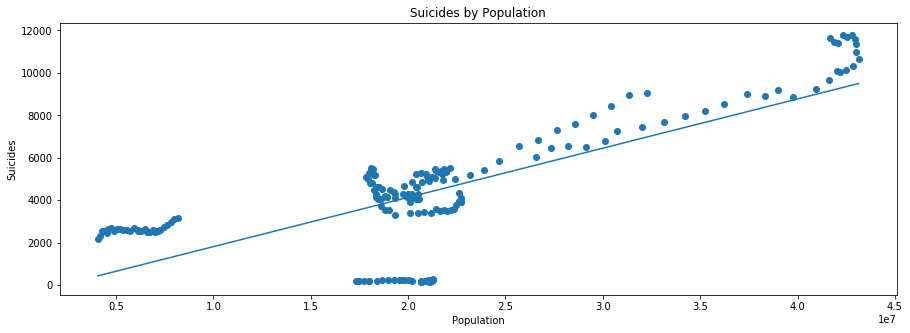

In [101]:
fig,ax=plt.subplots()
ax.scatter(US_Males.population, US_Males.suicides_no)
plt.title('Suicides by Population')  
plt.xlabel('Population')  
plt.ylabel('Suicides')

x_fit=np.linspace(np.min(US_Males.population), np.max(US_Males.population))
y_fit=x_fit*lin_out[0]+lin_out[1]

ax.plot(x_fit,y_fit)

In [80]:
# Scaling
mms = MinMaxScaler()
mms.fit(US_MPopSuic)
USMales_transformed = mms.transform(US_MPopSuic)

In [87]:
USMales_transformed

array([[0.        , 0.17583362],
       [0.35589702, 0.4443967 ],
       [0.43305453, 0.42995875],
       [0.57644211, 0.50893778],
       [0.40684913, 0.35544861],
       [0.3405167 , 0.00635957],
       [0.0029174 , 0.18984187],
       [0.35922388, 0.46141286],
       [0.44347016, 0.45711585],
       [0.59624971, 0.54305603],
       [0.4005281 , 0.35622207],
       [0.33969778, 0.00584393],
       [0.00591157, 0.20634239],
       [0.3615015 , 0.45986593],
       [0.45055892, 0.45024063],
       [0.61823256, 0.55328292],
       [0.39059871, 0.34187006],
       [0.34348528, 0.00584393],
       [0.00882897, 0.20771743],
       [0.3626531 , 0.43545892],
       [0.45524212, 0.45823307],
       [0.64190444, 0.54975937],
       [0.37959449, 0.34479202],
       [0.35026695, 0.00429701],
       [0.01220701, 0.20032657],
       [0.36418858, 0.4343417 ],
       [0.45754533, 0.44757649],
       [0.66718856, 0.57433826],
       [0.36838553, 0.34161224],
       [0.35689508, 0.00455483],
       [0.

In [58]:
#Finding the optimal K
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(USMales_transformed)
    Sum_of_squared_distances.append(km.inertia_)

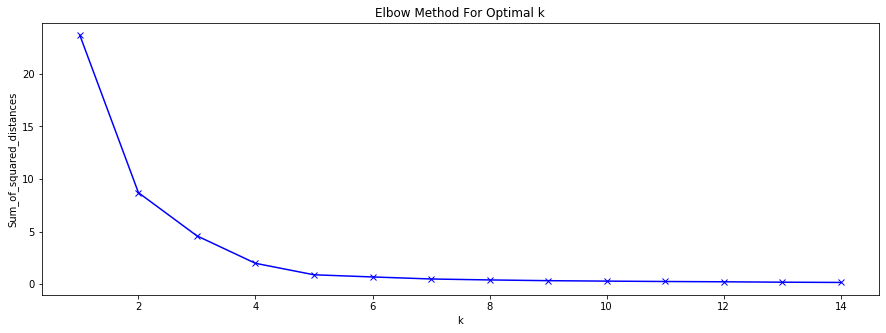

In [59]:
# Here we see that the elbow is at 3 so that will be our K value
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
km = KMeans(n_clusters = 3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [74]:
USMales_transformedDF = pd.DataFrame(USMales_transformed, columns = ['population', 'suicides_no'])
USMales_transformedDF.head(10)

,population,suicides_no
0,0.000000,0.175834
1,0.355897,0.444397
2,0.433055,0.429959
3,0.576442,0.508938
4,0.406849,0.355449
5,0.340517,0.006360
6,0.002917,0.189842
7,0.359224,0.461413
8,0.443470,0.457116
9,0.596250,0.543056


In [76]:
k_pred = km.fit_predict(USMales_transformedDF[['population', 'suicides_no']])
k_pred

array([2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0,
       0, 1, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0,
       0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1,
       0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1,
       1, 0, 0, 2, 2, 1, 1, 0, 0, 2])

In [77]:
USMales_transformed['cluster'] = k_pred
USMales_transformedDF.head(5)

,population,suicides_no
0,0.000000,0.175834
1,0.355897,0.444397
2,0.433055,0.429959
3,0.576442,0.508938
4,0.406849,0.355449


Text(0, 0.5, 'Suicide')

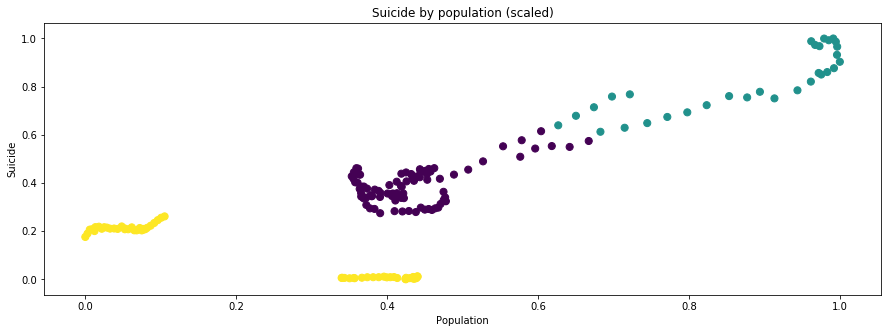

In [79]:
plt.scatter(USMales_transformedDF.population, USMales_transformedDF.suicides_no, c=k_pred, s=50, cmap='viridis')
plt.title('Suicide by population (scaled)')  
plt.xlabel('Population')  
plt.ylabel('Suicide')